dataset from https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset?resource=download

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
# read in the csv
df = pd.read_csv('sleep_health_lifestyle.csv')
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df['Physical Activity Level'].describe()

count    374.000000
mean      59.171123
std       20.830804
min       30.000000
25%       45.000000
50%       60.000000
75%       75.000000
max       90.000000
Name: Physical Activity Level, dtype: float64

# Cleaning and Encoding Categorical Variables

In [8]:
df['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [10]:
# merge normal weight and normal into the same categories
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

# verify changes
df['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [12]:
df['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [14]:
df[['Systolic BP','Diastolic BP']] = df['Blood Pressure'].str.split('/', expand = True)
df = df.drop('Blood Pressure', axis=1)
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [16]:
df = df.fillna('NSD') # NaN = No Sleep Disorder = NSD
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NSD,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NSD,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NSD,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [18]:
# make sleep disorder a categorical variable
# NSD = 0
# sleep apnea = 1
# insomnia = 2

In [20]:
# one hot encode the categorical variables
categorical_var = ['Gender', 'Occupation', 'BMI Category']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[categorical_var])
feature_names = encoder.get_feature_names_out(categorical_var)

# create new df with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=feature_names, index=df.index)

# combine encoded features with original df
df_encoded = pd.concat([df.drop(columns=categorical_var), encoded_df], axis=1)

# encode sleep disorder target variable
sleep_disorder_mapping = {'NSD': 0, 'Sleep Apnea': 1, 'Insomnia': 2}
df_encoded['Sleep Disorder'] = df_encoded['Sleep Disorder'].map(sleep_disorder_mapping)

In [22]:
df_encoded.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight
0,1,27,6.1,6,42,6,77,4200,0,126,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,28,6.2,6,60,8,75,10000,0,125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,28,6.2,6,60,8,75,10000,0,125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,28,5.9,4,30,8,85,3000,1,140,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,28,5.9,4,30,8,85,3000,1,140,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Person ID                        374 non-null    int64  
 1   Age                              374 non-null    int64  
 2   Sleep Duration                   374 non-null    float64
 3   Quality of Sleep                 374 non-null    int64  
 4   Physical Activity Level          374 non-null    int64  
 5   Stress Level                     374 non-null    int64  
 6   Heart Rate                       374 non-null    int64  
 7   Daily Steps                      374 non-null    int64  
 8   Sleep Disorder                   374 non-null    int64  
 9   Systolic BP                      374 non-null    object 
 10  Diastolic BP                     374 non-null    object 
 11  Gender_Female                    374 non-null    float64
 12  Gender_Male           

In [29]:
# verify that no NaN values exist
df_encoded.isna().sum()

Person ID                          0
Age                                0
Sleep Duration                     0
Quality of Sleep                   0
Physical Activity Level            0
Stress Level                       0
Heart Rate                         0
Daily Steps                        0
Sleep Disorder                     0
Systolic BP                        0
Diastolic BP                       0
Gender_Female                      0
Gender_Male                        0
Occupation_Accountant              0
Occupation_Doctor                  0
Occupation_Engineer                0
Occupation_Lawyer                  0
Occupation_Manager                 0
Occupation_Nurse                   0
Occupation_Sales Representative    0
Occupation_Salesperson             0
Occupation_Scientist               0
Occupation_Software Engineer       0
Occupation_Teacher                 0
BMI Category_Normal                0
BMI Category_Obese                 0
BMI Category_Overweight            0
d

In [31]:
# fix data types
columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
           'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic BP', 'Diastolic BP']

for col in columns:
    try:
        df_encoded[col] = pd.to_numeric(df[col], errors='coerce')
    except ValueError:
        print(f"Column '{col}' cannot be converted to float.")

In [33]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Person ID                        374 non-null    int64  
 1   Age                              374 non-null    int64  
 2   Sleep Duration                   374 non-null    float64
 3   Quality of Sleep                 374 non-null    int64  
 4   Physical Activity Level          374 non-null    int64  
 5   Stress Level                     374 non-null    int64  
 6   Heart Rate                       374 non-null    int64  
 7   Daily Steps                      374 non-null    int64  
 8   Sleep Disorder                   374 non-null    int64  
 9   Systolic BP                      374 non-null    int64  
 10  Diastolic BP                     374 non-null    int64  
 11  Gender_Female                    374 non-null    float64
 12  Gender_Male           

In [53]:
# save encoded df
df_encoded.to_csv('encoded_sleep_health.csv', index=False)

# Explore Variables

count    374.000000
mean       7.132086
std        0.795657
min        5.800000
25%        6.400000
50%        7.200000
75%        7.800000
max        8.500000
Name: Sleep Duration, dtype: float64

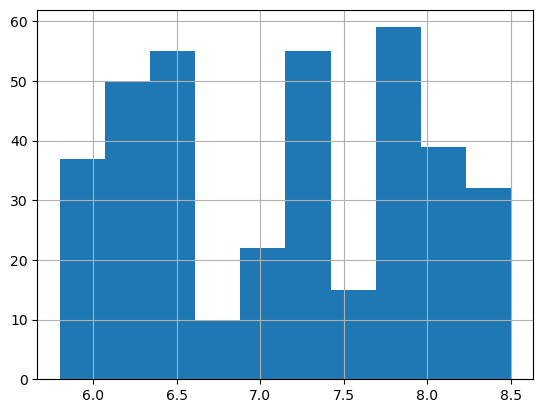

In [37]:
df_encoded['Sleep Duration'].hist()
df_encoded['Sleep Duration'].describe()

count    374.000000
mean       7.312834
std        1.196956
min        4.000000
25%        6.000000
50%        7.000000
75%        8.000000
max        9.000000
Name: Quality of Sleep, dtype: float64

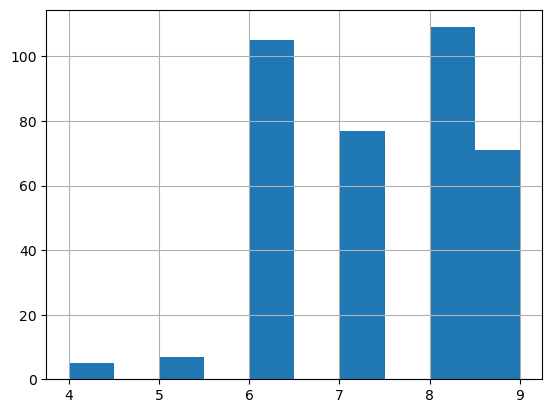

In [39]:
df_encoded['Quality of Sleep'].hist()
df_encoded['Quality of Sleep'].describe()

count    374.000000
mean      59.171123
std       20.830804
min       30.000000
25%       45.000000
50%       60.000000
75%       75.000000
max       90.000000
Name: Physical Activity Level, dtype: float64

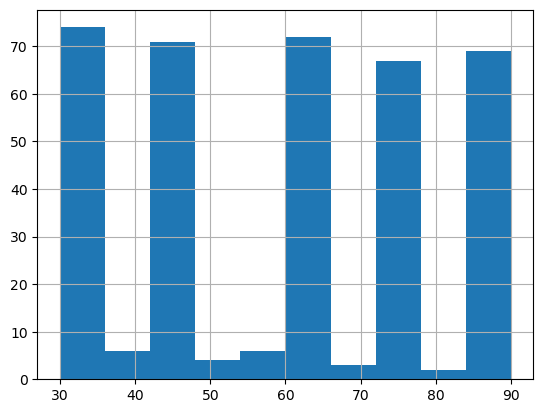

In [41]:
df_encoded['Physical Activity Level'].hist()
df_encoded['Physical Activity Level'].describe()

count    374.000000
mean       5.385027
std        1.774526
min        3.000000
25%        4.000000
50%        5.000000
75%        7.000000
max        8.000000
Name: Stress Level, dtype: float64

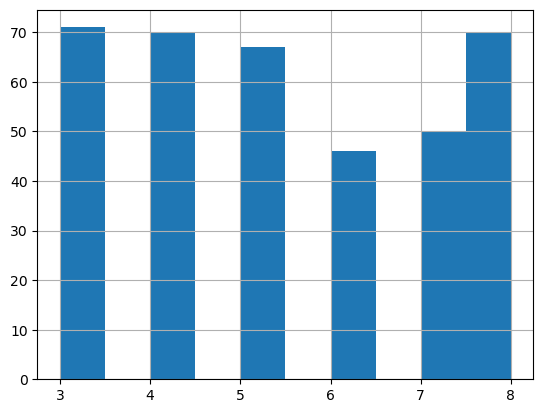

In [43]:
df_encoded['Stress Level'].hist()
df_encoded['Stress Level'].describe()

In [45]:
df['Systolic BP'].describe(), df['Diastolic BP'].describe()

(count     374
 unique     18
 top       130
 freq      101
 Name: Systolic BP, dtype: object,
 count     374
 unique     17
 top        80
 freq      111
 Name: Diastolic BP, dtype: object)

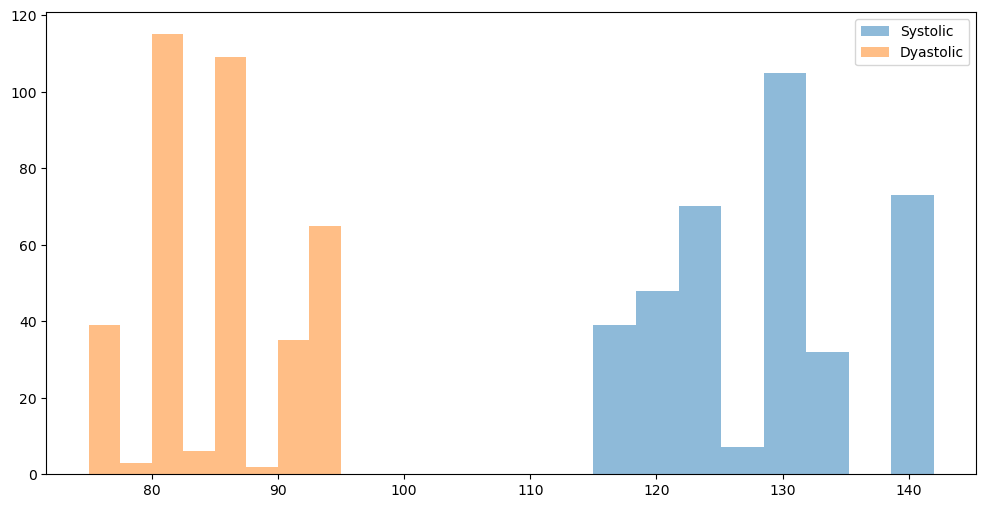

In [47]:
import matplotlib.pyplot as plt

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the first histogram
ax.hist(df_encoded['Systolic BP'], bins=8, alpha=0.5, label='Systolic')

# Plot the second histogram
ax.hist(df_encoded['Diastolic BP'], bins=8, alpha=0.5, label='Dyastolic')

# Add a legend
plt.legend()

# Show the plot
plt.show()

count    374.000000
mean      70.165775
std        4.135676
min       65.000000
25%       68.000000
50%       70.000000
75%       72.000000
max       86.000000
Name: Heart Rate, dtype: float64

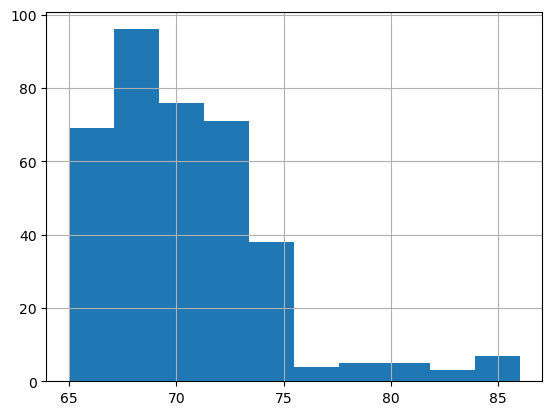

In [49]:
df_encoded['Heart Rate'].hist()
df_encoded['Heart Rate'].describe()

count      374.000000
mean      6816.844920
std       1617.915679
min       3000.000000
25%       5600.000000
50%       7000.000000
75%       8000.000000
max      10000.000000
Name: Daily Steps, dtype: float64

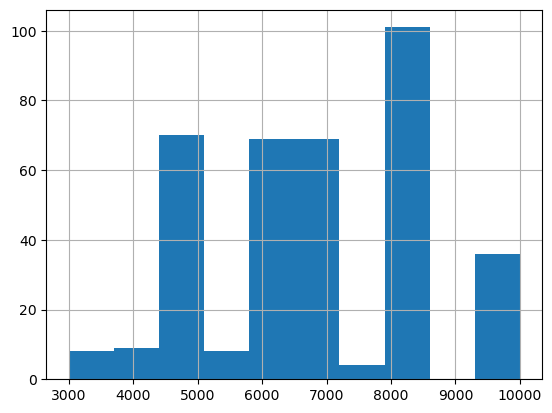

In [51]:
df_encoded['Daily Steps'].hist()
df_encoded['Daily Steps'].describe()